In [3]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib widget
%matplotlib inline

In [6]:
svec = loadtxt("../Data/3x3-0p/normal.cell")
rvec = svec/3
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))


In [7]:
n_data = loadtxt("../Data/3x3-0p-p2/n.pos")
m_data = loadtxt("../Data/3x3-0p-p2/m.pos")


n_atom = dot(n_data,svec)
n_atom = n_atom-n_atom[0]
m_atom = dot(m_data,svec)
m_atom += average(n_atom[:9]-m_atom[:9],axis=0)
u = around(m_atom - n_atom,8)

In [25]:
average(u[9:],axis=0)

array([-1.90222222e-06,  7.09955556e-05, -4.62222222e-07])

In [18]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
    plt.scatter(0,0,c="blue",s=s2,label="Nb")
    plt.scatter(0,0,c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.scatter(n_atom[:9].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:9].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[9:18].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[9:18].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            for k in [0,6,8]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
            for k in [3,4,7]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
            for k in [1,2,5]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
        
            for k in range(9,18):
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
    plt.title("NB Displacement")
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
#     plt.savefig("../Plot/3x3_p2_nb_mod.png",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

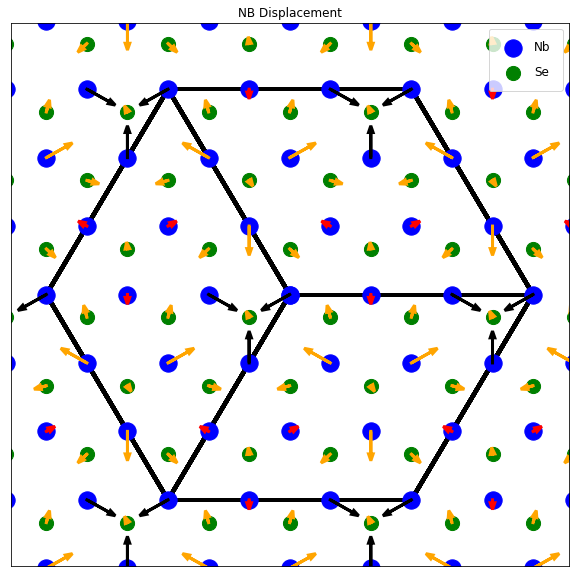

In [19]:
plot_lattice()

In [15]:
for i in u[9:18]:
    print(norm(i[:2]))

0.00021360243561345456
0.024979826832530284
0.02526370561476087
0.025053504091837136
6.895620711727118e-05
0.025280954906618934
0.02504491833427492
0.024984898569682047
0.0003940203002384522


In [ ]:
fig = plt.figure(figsize=(6,6))
hw=0.02
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)

for k in [0,6,8]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="blue",head_width=hw)   
for k in [1,2,5]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="black",head_width=hw)   
for k in [3,4,7]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="red",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Phase 2 Nb Modulation Vectors")
plt.savefig("p2_nb_mod.pdf",bbox_inches='tight')
plt.show()

In [291]:
uar = around(u,3)

In [292]:
nbar = around(n_atom[:9],3)

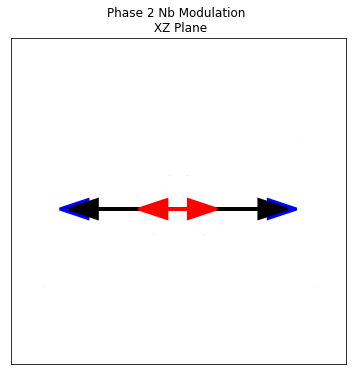

In [293]:
fig = plt.figure(figsize=(6,6))
hw=0.02
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)

for k in [0,6]:
    plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="blue",head_width=hw)   
for k in [1,5]:
    plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="black",head_width=hw)   
for k in [4,7]:
    plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="red",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Phase 2 Nb Modulation \n XZ Plane")
plt.savefig("p2_nb_xz.pdf",bbox_inches='tight')
plt.show()

In [294]:
uar

array([[-0.096, -0.055,  0.   ],
       [-0.086,  0.049,  0.   ],
       [ 0.   , -0.1  ,  0.   ],
       [-0.   , -0.013,  0.   ],
       [-0.012,  0.007,  0.   ],
       [ 0.086,  0.049,  0.   ],
       [ 0.096, -0.055,  0.   ],
       [ 0.011,  0.007,  0.   ],
       [-0.   ,  0.111,  0.   ],
       [ 0.   , -0.   , -0.136],
       [ 0.018, -0.018, -0.216],
       [-0.006,  0.024, -0.216],
       [ 0.024, -0.007, -0.216],
       [-0.   , -0.   , -0.21 ],
       [ 0.006,  0.024, -0.216],
       [-0.024, -0.007, -0.216],
       [-0.018, -0.018, -0.216],
       [-0.   ,  0.   , -0.319],
       [ 0.   , -0.   ,  0.136],
       [ 0.018, -0.018,  0.216],
       [-0.006,  0.024,  0.216],
       [ 0.024, -0.007,  0.216],
       [-0.   , -0.   ,  0.21 ],
       [ 0.006,  0.024,  0.216],
       [-0.024, -0.007,  0.216],
       [-0.018, -0.018,  0.216],
       [-0.   ,  0.   ,  0.319]])

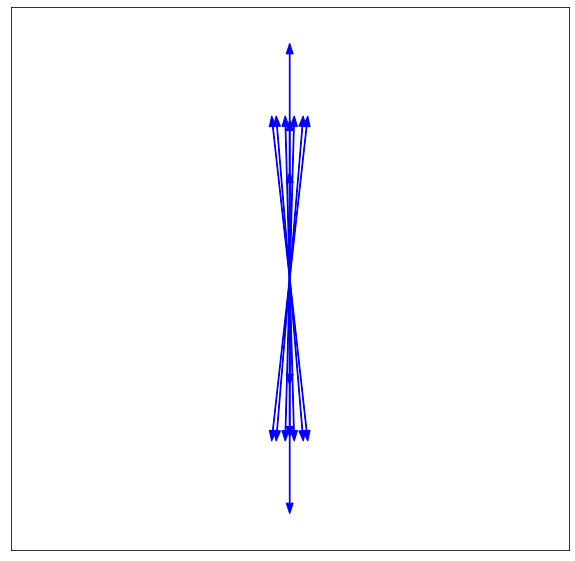

In [310]:
fig = plt.figure(figsize=(10,10))
hw=0.01

for k in range(9,27):
    plt.arrow(0,0,uar[k][0],uar[k][2],zorder=2,color="blue",head_width=hw,lw=1)   
    plt.scatter([0,uar[k][0]*1.1],[0,uar[k][2]*1.1],s=0.0001)   

# for k in [2,4]:
#     plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="red",head_width=hw)   
# for k in [1,8]:
#     plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="black",head_width=hw)   
plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 1 Nb Modulation \n XZ Plane")
# plt.savefig("p1_nb_xz.pdf",bbox_inches='tight')
plt.show()


In [283]:
sum(uar[0:9],axis=0)

array([ 1.7110e-05, -6.3896e-04,  4.1400e-06])

In [284]:
sum(uar[9:],axis=0)

array([-8.86335276e-18, -1.00000000e-08, -1.99999999e-08])

In [286]:
around(uar,1)

array([[-0.1, -0.1,  0. ],
       [-0.1,  0. ,  0. ],
       [ 0. , -0.1,  0. ],
       [-0. , -0. ,  0. ],
       [-0. ,  0. ,  0. ],
       [ 0.1,  0. ,  0. ],
       [ 0.1, -0.1,  0. ],
       [ 0. ,  0. ,  0. ],
       [-0. ,  0.1,  0. ],
       [ 0. , -0. , -0.1],
       [ 0. , -0. , -0.2],
       [-0. ,  0. , -0.2],
       [ 0. , -0. , -0.2],
       [-0. , -0. , -0.2],
       [ 0. ,  0. , -0.2],
       [-0. , -0. , -0.2],
       [-0. , -0. , -0.2],
       [-0. ,  0. , -0.3],
       [ 0. , -0. ,  0.1],
       [ 0. , -0. ,  0.2],
       [-0. ,  0. ,  0.2],
       [ 0. , -0. ,  0.2],
       [-0. , -0. ,  0.2],
       [ 0. ,  0. ,  0.2],
       [-0. , -0. ,  0.2],
       [-0. , -0. ,  0.2],
       [-0. ,  0. ,  0.3]])

(-0.11000000000000001,
 0.11000000000000001,
 -0.11000000000000001,
 0.11000000000000001)

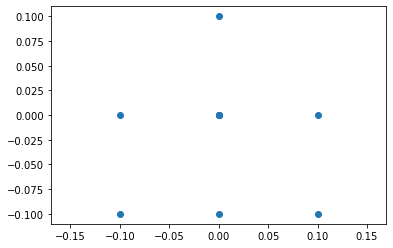

In [289]:
plt.scatter(around(uar,1)[:9].T[0],around(uar,1)[:9].T[1])
plt.axis("equal")

In [202]:
around(utilde,3)

array([[ 0.059-0.271j,  0.034-0.157j,  0.   +0.j   ],
       [ 0.   +0.j   , -0.237-0.217j,  0.   +0.j   ],
       [-0.059+0.271j,  0.034-0.157j,  0.   +0.j   ]])

In [296]:
utilde = dot(exp(-1j*dot(n_atom[:9],qvec.T)).T,u[:9])

In [304]:
utilde = dot(exp(-1j*dot(n_atom,qvec.T)).T,u)

In [305]:
for i in utilde:
    print(norm(i))

0.3919241130653093
0.3911577384264631
0.39215793945211924


In [306]:
for i in real(utilde):
    print(norm(i))

0.3778281112856726
0.09593183438267333
0.09996918349770949


In [307]:
for i in imag(utilde):
    print(norm(i))

0.1041653912023122
0.37921162888666893
0.3792018088381612


In [161]:
linalg.norm(qvec[0])/linalg.norm(utilde[2])

4.389418235793516

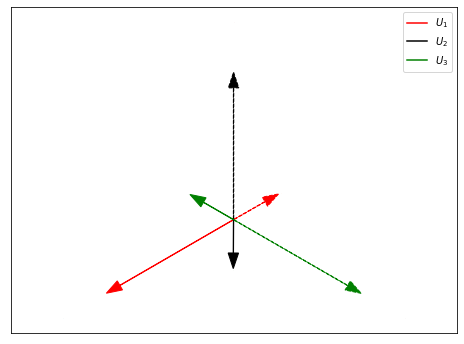

In [308]:
fig = plt.figure(figsize=(8,6))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.03,color=colors[i],ls="-",lw=1)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.03,color=colors[i],ls="--",lw=1)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
plt.show()

In [309]:
for i in utilde:
    print(arctan(imag(i)[1]/real(i)[1])/pi*180)

-15.276141882940877
-75.80356100180664
-75.23204481337243
